<a href="https://colab.research.google.com/github/carvalheirafc/jupyter_backups/blob/main/digital_image_processing/wiener_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install diplib 

In [24]:
import diplib as dip
import numpy as np
import cv2

In [45]:
from scipy.signal import convolve2d
import math
def estimate_noise(I):

  H, W = I.shape

  M = [[1, -2, 1],
       [-2, 4, -2],
       [1, -2, 1]]

  sigma = np.sum(np.sum(np.absolute(convolve2d(I, M))))
  sigma = sigma * math.sqrt(0.5 * math.pi) / (6 * (W-2) * (H-2))

  return sigma

In [39]:
image = cv2.imread('bear.png', cv2.IMREAD_GRAYSCALE)

In [47]:
noise_var = estimate_noise(np.array(image))
noise_var

68.91719045468601

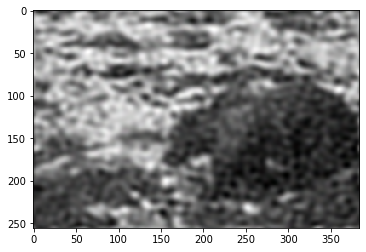

In [49]:
image = image = dip.Image(cv2.imread('bear.png'))
kernel = dip.CreateGauss([3, 3]).Pad(image.Sizes())

smooth = dip.ConvolveFT(image, kernel)
smooth = dip.GaussianNoise(smooth, 5.0)
#smooth = dip.MedianFilter(smooth)

'''

H:  Fourier Transform of kernel
Sn: Power Spectral Density of the noise
Sf: Power Spectral Density of image
G:  Fourier Transform of Original Image

'''
H = dip.FourierTransform(kernel)
Sn = dip.Image(noise_var * smooth.NumberOfPixels()) 
Sf = dip.SquareModulus(F)
G = dip.FourierTransform(smooth)


'''
Wiener Filter Calculation

'''
R = dip.Conjugate(H) / ( dip.SquareModulus(H) + Sn / Sf )
R = np.array(R) * np.array(G)

result_image = dip.FourierTransform(R, {"inverse", "real"})

result_image.Show()

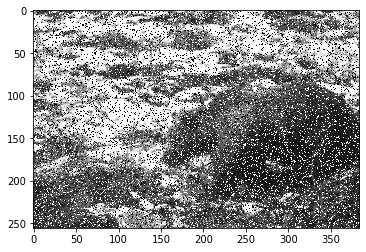

In [17]:
image.Show()